# HW02 - Работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib

### Александрова Мария ТКБО-03-22

Сначала импортируем все необходимые библиотеки

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка датасета

In [8]:
df = pd.read_csv("S02-hw-dataset.csv")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Информация о данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Описательные статистики

In [10]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## Пропуски, дубликаты и контроль качества

Доля пропусков по столбцам

In [11]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Проверка дубликатов

In [13]:
df.duplicated().sum()

np.int64(1)

Поиск подозрительных значений

В нашем случае: если age пустое, age > 100, purchases < 0, revenue < 0, revenue = 0 при purchases > 0, purchases = 0, но revenue > 0

In [19]:
df[df["age"].isna()]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


In [20]:
df[df["age"] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [21]:
df[df["purchases"] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [22]:
df[(df["revenue"] == 0) & (df["purchases"] > 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [23]:
df[(df["purchases"] == 0) & (df["revenue"] > 0)]

,user_id,age,country,purchases,revenue


**Краткое описание проблем качества данных**

В двух строках отсутствует возраст (age).

У одного пользователя возраст равен 120.

Присутствует одна строка с отрицательным количеством покупок (purchases = -1).

Есть дубликат строки user_id = 10.

Некорректные сочетания revenue = 0 при purchases > 0.

## Базовый EDA: частоты, группировки, агрегаты

Частоты по стране

In [24]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Средние значения по странам

In [25]:
df.groupby("country")[["purchases", "revenue"]].agg(["mean", "sum"])

purchases          revenue       
             mean sum         mean    sum
country                                  
CN       4.500000   9  1054.000000   2108
DE       6.500000  39  1445.500000   8673
FR       4.250000  51   675.916667   8111
RU       4.769231  62   790.076923  10271
US       4.625000  37   557.375000   4459

Группировка по возрастным диапазонам

In [26]:
df["age_group"] = pd.cut(df["age"], bins=[0,20,30,40,50,60,120])
df["age_group"].value_counts()

age_group
(20, 30]     12
(30, 40]     11
(50, 60]      6
(40, 50]      6
(0, 20]       3
(60, 120]     1
Name: count, dtype: int64

**Выводы по EDA**

Больше всего пользователей из России и Франции.

Средний revenue сильно различается между странами: у DE самый высокий.

Возрастная группа 20-30 встречается чаще остальных.

## Визуализации

1. Гистограмма возраста

Гистограмма показывает распределение возраста. Видно, что большинство пользователей находятся в диапазоне 20–40 лет. Есть аномальный возраст 120 лет, который выделяется в хвосте распределения.

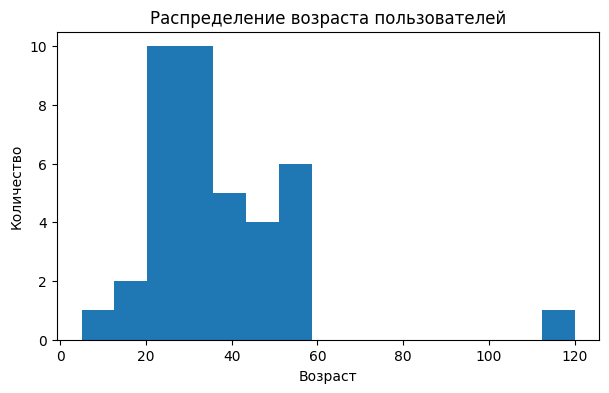

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(7,4))
plt.hist(df["age"].dropna(), bins=15)
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

plt.savefig("figures/1.png", dpi=200)
plt.show()

2. Boxplot дохода (revenue)

Boxplot демонстрирует широкий разброс revenue. Есть заметные высокие значения, которые тянут верхний "ус". Некоторые значения дохода выглядят как потенциальные выбросы, что типично для продаж.

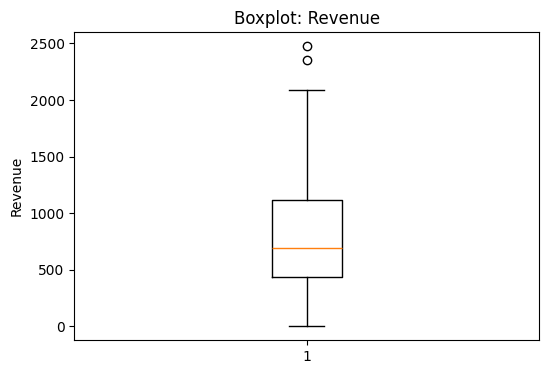

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(6,4))
plt.boxplot(df["revenue"])
plt.title("Boxplot: Revenue")
plt.ylabel("Revenue")
plt.show()

plt.savefig("figures/2-1.png", dpi=200)
plt.show()


2-2. Boxplot по странам

Пользователи из Германии (DE) приносят самый высокий доход как по медиане, так и по максимальным значениям. CN и RU занимают среднюю позицию: у них умеренные или высокие медианы и значительный разброс доходов. US и FR имеют более низкие медианы revenue, при этом FR, несмотря на низкую медиану, содержит несколько пользователей с высокими spending-значениями.

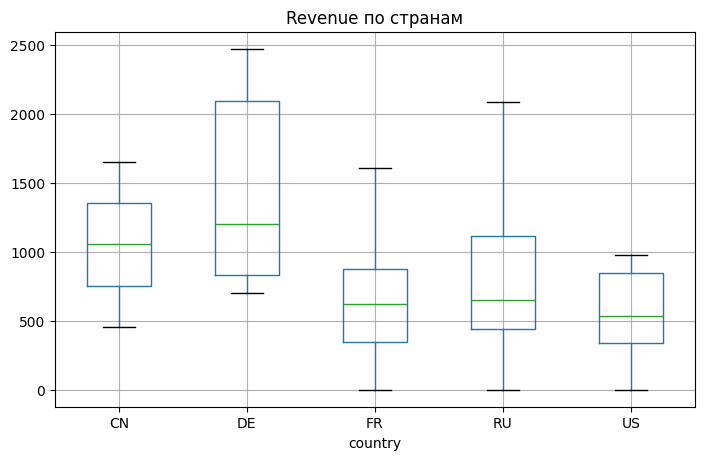

<Figure size 640x480 with 0 Axes>

In [33]:
df.boxplot(column="revenue", by="country", figsize=(8,5))
plt.title("Revenue по странам")
plt.suptitle("")
plt.show()

plt.savefig("figures/2-2.png", dpi=200)
plt.show()

3. Scatter plot: связь purchases и revenue

Scatter plot показывает ожидаемую положительную зависимость между количеством покупок и доходом. Однако есть точки с purchases > 0 и revenue = 0, что указывает на ошибки данных.

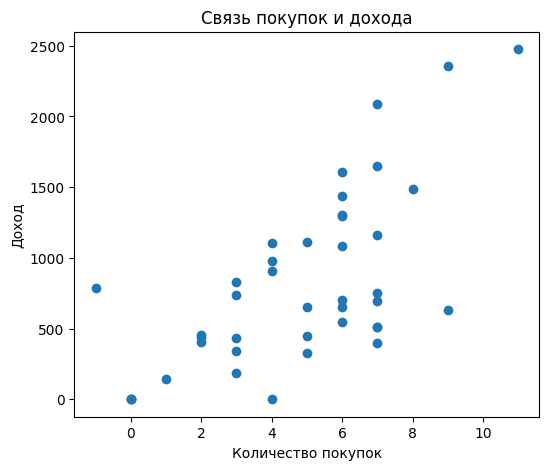

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(6,5))
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("Количество покупок")
plt.ylabel("Доход")
plt.title("Связь покупок и дохода")
plt.show()

plt.savefig("figures/3.png", dpi=200)
plt.show()